In [2]:
from neuron import h, gui, rxd
from neuron.units import ms, mV
%matplotlib notebook

In [3]:
# create section
soma = h.Section(name='soma')
nseg = 1

In [7]:
# change parameters to fit Drosophila model

soma.Ra = 35.4
soma.cm = 1

# insert passive properties
soma.insert('pas')
# soma.g_pas = 5.8e-5
soma.e_pas = -50

# soma(0.5).hh.ena = 50
# soma(0.5).hh.ek = -77

# insert hodgkin-huxley mechanism
soma.insert('hh')

# insert channel conductances
soma(0.5).hh.gnabar = 0.12
soma(0.5).hh.gkbar = 0.036
soma(0.5).hh.gl = 0.0003
soma(0.5).hh.el= -54.3

# soma(0.5).na.ina = 1
# soma(0.5).k.ik = 1

In [8]:
# access new parameters
soma.psection()

{'point_processes': {},
 'density_mechs': {'pas': {'g': [0.001], 'e': [-50.0], 'i': [0.0]},
  'hh': {'gnabar': [0.12],
   'gkbar': [0.036],
   'gl': [0.0003],
   'el': [-54.3],
   'gna': [0.0],
   'gk': [0.0],
   'il': [0.0],
   'm': [0.0],
   'h': [0.0],
   'n': [0.0]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [0.0],
   'dina_dv_': [0.0]},
  'k': {'ek': [-77.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [0.0],
   'dik_dv_': [0.0]}},
 'morphology': {'L': 100.0,
  'diam': [500.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_0000013d38eb72b0',
 'cell': None}

In [9]:
# ideal current clamp
iclamp = h.IClamp(soma(0.5)) # insert current clamp in center of soma to induce membrane dynamics
iclamp.delay = 2
iclamp.dur = 0.1
iclamp.amp = 0.9

In [10]:
v_vec = h.Vector()             # Membrane potential vector
t_vec = h.Vector()             # Time stamp vector
v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

Vector[4]

In [11]:
h.tstop = 300.0
h.run()

0.0

In [12]:
h.load_file('stdrun.hoc')

1.0

<IPython.core.display.Javascript object>


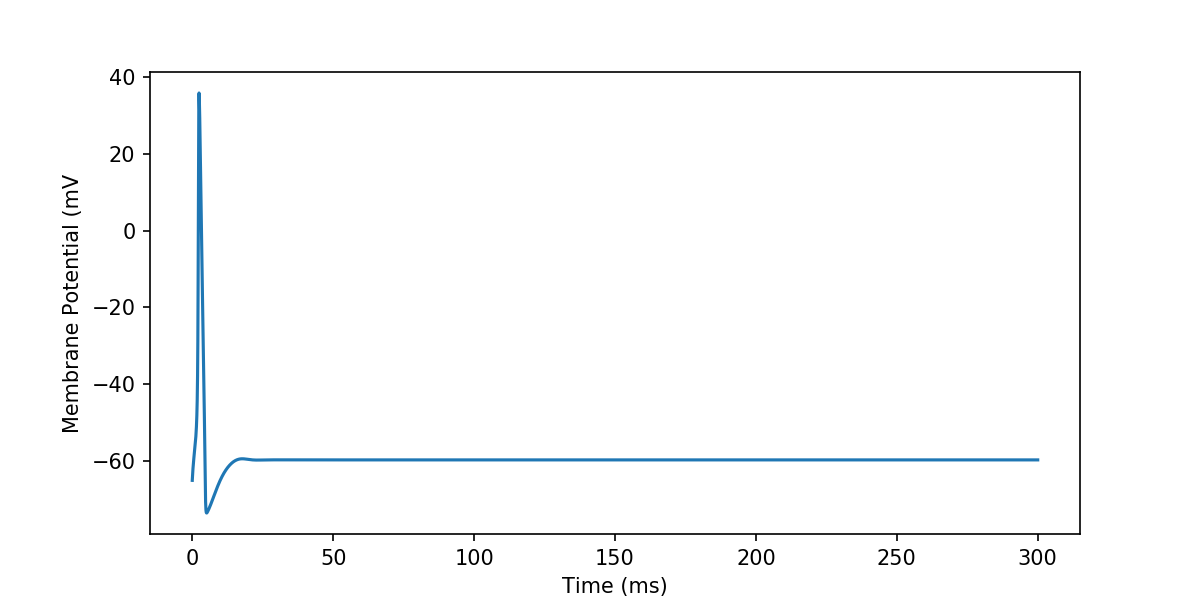

In [13]:
from matplotlib import pyplot
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
pyplot.plot(t_vec, v_vec)
pyplot.xlabel('Time (ms)')
pyplot.ylabel('Membrane Potential (mV')
pyplot.show()